데이터 분석에 앞서 전처리가 완료된 데이터에 대해 결측치나 이상치를 처리

- 제거 : 결측치나 이상치를 가진 데이터를 제거하는 것을 의미한다
- 제거를 하게 되면 데이터가 왜곡되지 않지만 학습량이 줄어든다
- 대체 : 결측치나 이상치를 다른 값으로 바꾸는 것을 의미한다
- 대체를 하게 되면 데이터가 왜곡되지만 학습량은 유지된다
- 제거를 추천. 제거 후 성능이 매우 안좋다면 일단 집에 전화하고 대체할 값을 찾아야 한다
- 대체를 선택했을 때는 누구나 납득할 수 있는 객관적인 지표를 찾아야 하고 찾을 수 없다면 평균이나 중간값을 추천

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


### 결측치 확인

In [3]:
# Non-Null Count : 결측치를 제외한 데이터의 갯수
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 철수 to 호영
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학년      5 non-null      int64  
 1   성별      5 non-null      object 
 2   국어      5 non-null      int64  
 3   영어      4 non-null      float64
 4   수학      3 non-null      float64
 5   과학      4 non-null      float64
dtypes: float64(3), int64(2), object(1)
memory usage: 280.0+ bytes


In [4]:
# isna : 결측치인 부분은 True, 결측치가 아닌 부분을 False로 되어 있는 DataFrame을 반환
# sum : 각 column의 총 합을 구한다. True나 False로 되어 있을 경우 각각 1, 0으로 환산하여 총 합을 구한다
df1.isna().sum()

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

### 결측치 제거

In [5]:
# 결측치가 포함된 모든 행을 제거
df2 = df1.dropna()
df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [6]:
# 특정 column에 결측치가 있는 row를 제거
df3 = df1.dropna(subset=['수학', '과학'])
df3

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [7]:
# 모든 column에 결측치가 있는 row를 삭제
# NEVER GONNA SEE THIS CASE
df1.loc['길동'] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
df1

df1.dropna(how='all', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0


### 결측치가 포함된 열 제거

In [8]:
# 결측치가 하나라도 들어있는 column은 모두 제거
df2 = df1.dropna(axis=1)
df2

,학년,성별,국어
이름,,,
철수,1.0,남자,98.0
영희,2.0,여자,88.0
민수,1.0,남자,92.0
수현,3.0,여자,63.0
호영,4.0,남자,120.0


### 결측치 대체

In [9]:
# DataFrame --> 
df2 = df1.fillna(value=50)
df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,50.0,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,50.0,50.0
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,50.0,88.0


In [10]:
# column별로 결측치를 대체
df1['영어'].fillna(value=50, inplace=True)
df1['수학'].fillna(value=60, inplace=True)
df1['과학'].fillna(value=70, inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,50.0,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,60.0,70.0
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,60.0,88.0


### 이상치 처리
- 정상 범위를 벗어나는 값
- 논리적으로 판단하는 방법 : 사회통념상 상식적인 값으로 판단
- 극단치 : 다른 대부분의 값들과 극단적으로 수치가 크거나 작은 값

In [11]:
# 요약 통계 정보를 통해 이상치 존재 여부를 확인
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [12]:
df1[['국어', '영어', '수학', '과학']].describe()

,국어,영어,수학,과학
count,5.000000,4.000000,3.000000,4.000000
mean,92.200000,67.500000,60.333333,73.500000
std,20.474374,17.078251,28.536526,10.246951
min,63.000000,50.000000,31.000000,64.000000
25%,88.000000,57.500000,46.500000,68.500000
50%,92.000000,65.000000,62.000000,71.000000
75%,98.000000,75.000000,75.000000,76.000000
max,120.000000,90.000000,88.000000,88.000000


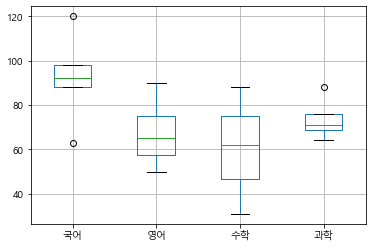

In [13]:
# boxplot을 통해 극단치를 확인한다
# 동그라미로 표시되는 부분이 극단치에 해당한다
# 극단치는 정상데이터 여부를 반드시 확인해야 한다
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'

df1[['국어', '영어', '수학', '과학']].boxplot()
plt.show()

In [14]:
# 카테고리형 데이터의 이상치 확인
df1['학년'].value_counts().index

Int64Index([1, 2, 3, 4], dtype='int64')

In [19]:
# 이상치라고 판단되는 row의 index를 구한다
idx = df1.query('국어 > 90').index
idx

Index(['철수', '민수', '호영'], dtype='object', name='이름')

In [20]:
# 제거
df2 = df1.drop(idx)
df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [21]:
# 다른 값으로 대체
df1.loc[idx, '국어'] = 90
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,90,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,90,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,90,50.0,NaN,88.0
